In [5]:
import pandas as pd
import numpy as np
import codecs
import io
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [6]:
def merge_two_dicts(x, y):
    z = x.copy()   # start with x's keys and values
    z.update(y)    # modifies z with y's keys and values & returns None
    return z

class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)

              coef     absol
2016      0.578970  0.578970
october   0.437541  0.437541
november  0.379234  0.379234
hillary   0.370566  0.370566
anti      0.364145  0.364145
share     0.312655  0.312655
source    0.287841  0.287841
com       0.270479  0.270479
us        0.261416  0.261416
year old  0.243031  0.243031
                            coef     absol
ms                     -0.264463  0.264463
president trump        -0.273465  0.273465
mr                     -0.299179  0.299179
president donald       -0.314026  0.314026
president donald trump -0.314951  0.314951
2017                   -0.357187  0.357187
twitter                -0.450016  0.450016
follow                 -0.450386  0.450386
breitbart              -0.474323  0.474323
on twitter             -0.491545  0.491545


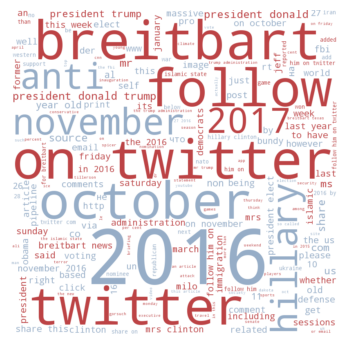

In [13]:
#m='5000-5gram-l1_'
m='10000-5gram-l1_'
#m='1000-2gram-l1_class1feat’ #bare til filnavnet på koefficientfilen

n = 100



colors = ('#BC4345', '#96ADC7')

coefs = pd.read_csv('allcoefs_10000-5gram-l1_.csv', sep='\t') #pd.read_csv('coefs'+m+'.csv', sep='\t')

coefs.columns = [s.replace('_', ' ') for s in coefs.columns]
coefs = coefs.T
coefsav = pd.DataFrame(coefs.mean(axis=1), columns=['coef']) #denne skal du ikke bruge
coefsav['absol'] = abs(coefsav)
#coefsav['stdev'] = coefs.std(axis=1)
#coefsav['mean-std'] = coefsav.absol - coefsav.stdev
coefsav.sort_values(by='coef', inplace=True, ascending=False)
print(coefsav.head(10))
print(coefsav.tail(10))

wordcloud = WordCloud(background_color="white", collocations=True, width = 800, height = 800)
wordcloud.generate_from_frequencies(frequencies=merge_two_dicts(coefsav.head(n).to_dict(orient='dict')['absol'], coefsav.tail(n).to_dict(orient='dict')['absol']))
color_to_words = {}
color_to_words[colors[0]] = list(coefsav.loc[coefsav.coef<0].index)
color_to_words[colors[1]] = list(coefsav.loc[coefsav.coef>0].index)
# positive coefs should be "towards" 1, and negative is "towards" 0.
# in kaggle dataset, 1 is "unreliable".

default_color = 'gray'
grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)
wordcloud.recolor(color_func=grouped_color_func)

fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
ax.imshow(wordcloud, interpolation="bilinear")
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)

plt.savefig('wordcloud_'+m+'.pdf', bbox_inches = 'tight', pad_inches = 0, dpi=600)
plt.show()